In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


In [18]:
# library for numeric operation
import numpy as np
# library for plotting
import matplotlib.pyplot as plt
# for logorithm color scale
from matplotlib.colors import LogNorm

In [19]:
# autoreload modified library
%load_ext autoreload
%autoreload 2

# CFG.* : configurations
# CST.* : constants
from spectra_src.ImportAll import *

# disable warning message
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# structs
from spectra_src.Struct import Atom, Atmosphere, Radiation


# self-made help function
from spectra_src.Util import HelpUtil

# plotting functionality
from spectra_src.Visual import Plotting#, Grotrian

# for 0D statistical equilibrium
from spectra_src.Function.SEquil import SELib


---


In [5]:

import os 

# path for configuration file
conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/H.conf" )
# atom, mesh struct
atom, wMesh, path_dict = Atom.init_Atom_(conf_path , is_hydrogen=True)
# atmosphere struct
atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E11, Te=7.E3, Vd=0., Vt=5.E5)
# radiation struct
radiation = Radiation.init_Radiation_(atmos, wMesh, 0.5)

In [7]:
HelpUtil.help_(atom)

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
Atom
|- Z                       int                                  v: 1
|- Mass                    float                                v: 1.008
|- Abun                    float                                v: 1.0
|- nLevel                  int                                  v: 9
|- nLine                   int                                  v: 28
|- nCont                   int                                  v: 8
|- nTran                   int                                  v: 36
|- nRL                     int                                  v: 0
|- Level                   struct array                         s: (9,)
  |-  erg                  float64                              s: (9,)
  |-  g                    in

In [8]:
HelpUtil.help_(atmos)

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
Atmosphere0D
|- Nh                      float                                v: 1000000000000.0
|- Ne                      float                                v: 100000000000.0
|- Te                      float                                v: 7000.0
|- Vd                      float                                v: 0.0
|- Vt                      float                                v: 500000.0
|- ndim                    int                                  v: 0
|- is_uniform              bool                                 v: True
|- Tr                      float                                v: 6000.0
|- use_Tr                  bool                                 v: False
|- doppler_shift_continuum  bool                   

In [21]:
HelpUtil.help_(radiation)

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
Radiation
|- backRad                 ndarray                              s: (2, 4158162)
|- PI_intensity            ndarray                              s: (8, 41)


---

---


## Statictical Equilibrium

with $Planck(T_{r})$ as background radiation (use radiation temperature)


In [23]:
atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E11, Te=1.E4, Vd=0., Vt=5.E5, Tr=6.E3, use_Tr=True)

SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)


print(f"Electron temperature  = {atmos.Te:.1E}")
print(f"Electron density      = {atmos.Ne:.1E}")
print(f"Radiation temperature = {atmos.Tr:.1E}")
print('-'*35)
print("SE  :")
for v in SE_con.n_SE[:]:
    print(f"{v:.4E}",end="  ")
print(f"\nLTE :")
for v in SE_con.n_LTE[:]:
    print(f"{v:.4E}",end="  ")


Electron temperature  = 1.0E+04
Electron density      = 1.0E+11
Radiation temperature = 6.0E+03
-----------------------------------
SE  :
9.3761E-01  1.0247E-08  6.0146E-10  2.9739E-10  2.5427E-10  2.6191E-10  2.9356E-10  3.4400E-10  6.2394E-02  
LTE :
2.9534E-04  8.5584E-09  2.1514E-09  1.7761E-09  1.9457E-09  2.3104E-09  2.7994E-09  3.3906E-09  9.9970E-01  

with solar background radiation (with solar radiation data)


In [26]:
atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E11, Te=1.E4, Vd=0., Vt=5.E5, Tr=6.E3, use_Tr=False)
SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)


print(f"Electron temperature  = {atmos.Te:.1E}")
print(f"Electron density      = {atmos.Ne:.1E}")
print('-'*35)
print("SE  :")
for v in SE_con.n_SE[:]:
    print(f"{v:.4E}",end="  ")
print(f"\nLTE :")
for v in SE_con.n_LTE[:]:
    print(f"{v:.4E}",end="  ")


Electron temperature  = 1.0E+04
Electron density      = 1.0E+11
-----------------------------------
SE  :
7.7996E-01  3.0904E-07  2.8527E-09  1.0432E-09  8.0050E-10  7.5313E-10  7.9961E-10  9.3354E-10  2.2004E-01  
LTE :
2.9534E-04  8.5584E-09  2.1514E-09  1.7761E-09  1.9457E-09  2.3104E-09  2.7994E-09  3.3906E-09  9.9970E-01  

In [12]:
# SE_con is a container for populations (LTE, SE)
HelpUtil.help_(SE_con)

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
SE_Container
|- n_SE                    ndarray                              s: (9,)
|- n_LTE                   ndarray                              s: (9,)
|- nj_by_ni                ndarray                              s: (36,)
|- wave_mesh_shifted_1d    ndarray                              s: (1148,)
|- absorb_prof_1d          ndarray                              s: (1148,)
|- Line_mesh_idxs          ndarray                              s: (28, 2)
|- Jbar                    ndarray                              s: (28,)


In [13]:
# Rate_con is a container for transition rates [s^{-1}]
HelpUtil.help_(Rate_con)

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
TranRates_Container
|- Rji_spon                ndarray                              s: (36,)
|- Rji_stim                ndarray                              s: (36,)
|- Rij                     ndarray                              s: (36,)
|- Cji_Ne                  ndarray                              s: (36,)
|- Cij_Ne                  ndarray                              s: (36,)
|- Rmat                    ndarray                              s: (9, 9)
|- Cmat                    ndarray                              s: (9, 9)


to loop over physical parameters, modify `Atmosphere.Atmosphere0D` in the loop, and create n-dimension array to store the result you need.

## Ionization fraction v.s. Electron temperature


In [28]:
nTe = 51
Te = np.linspace(3E3, 2E4, nTe)

Ne = np.ones(nTe) * 1E13
Vd = np.ones(nTe) * 0E5 # [cm]
Vt = np.ones(nTe) * 5E5
Tr = 6E3


n_LTE = np.empty((atom.nLevel, nTe))
n_SE_Tr  = np.empty((atom.nLevel, nTe))

for kt in range(nTe):
    atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E13, Te=Te[kt], Vd=0., Vt=5.E5, Tr=6.E3, use_Tr=True)
    SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)
    #SE_con_list.append( SE_con )
    n_LTE[:,kt] = SE_con.n_LTE[:]
    n_SE_Tr[:,kt] = SE_con.n_SE[:]

n_SE  = np.empty((atom.nLevel, nTe))
for kt in range(nTe):
    atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E13, Te=Te[kt], Vd=0., Vt=5.E5, Tr=6.E3, use_Tr=False)
    SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)
    n_SE[:,kt] = SE_con.n_SE[:]

etas = {}
for kLevel in range(atom.nLevel):
    eta = {}
    eta["LTE"] = n_LTE[kLevel,:] / n_LTE[:,:].sum(axis=0)
    eta["SE_Tr"] = n_SE_Tr[kLevel,:] / n_SE_Tr[:,:].sum(axis=0)
    eta["SE_data"] = n_SE[kLevel,:] / n_SE[:,:].sum(axis=0)
    etas[f"{kLevel}"] = eta


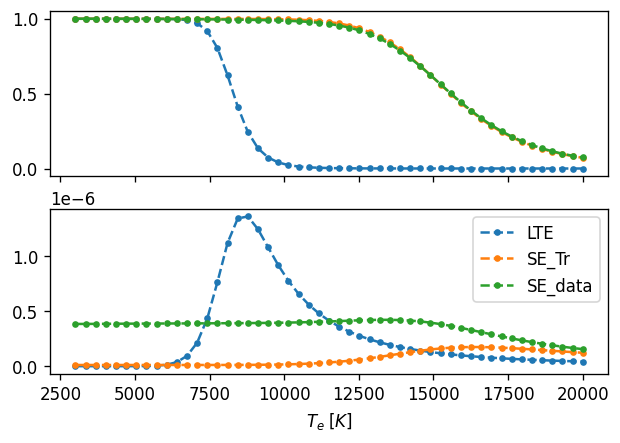

In [29]:
fig, axs = plt.subplots(2,1, figsize=(6,4), dpi=120, sharex = True)

ax = axs[0]
eta = etas["0"]
for i, name in enumerate(eta.keys()):
    ax.plot(Te[:], eta[name][:], '--o', markersize=3, label=name)

ax = axs[1]
eta = etas["1"]
for i, name in enumerate(eta.keys()):
    ax.plot(Te[:], eta[name][:], '--o', markersize=3, label=name)

ax.set_xlabel("$T_{e} \; [K]$")
#ax.set_ylabel("$ n_{H\, II} \; / \; n_{H} $")
ax.legend(loc="best")
#ax.set_yscale('log')
#ax.set_ylim(0, 2E-7)
#ax.set_title("ionization fraction v.s. eletron temperature")
plt.show()

## Ionization fraction v.s. Electron density

In [30]:

nNe = 51
Ne = np.logspace(8,15, nNe)
#Te = np.ones(nNe) * 8E3
Tr = 6E3
#Vt = np.ones(nNe) * 5E5
#Vd = np.ones(nNe) * 0E5

eta = {}
## radiation temperature
n_LTE    = np.ones((atom.nLevel, nNe))
n_SE_Tr  = np.ones((atom.nLevel, nNe))

for k in range(nNe):
    atmos = Atmosphere.Atmosphere0D(Nh=1.E10, Ne=Ne[k], Te=8.E3, Vd=0., Vt=5.E5, Tr=6.E3, use_Tr=True)
    SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)
    n_LTE[:,k] = SE_con.n_LTE[:]
    n_SE_Tr[:,k] = SE_con.n_SE[:]

eta["LTE"] = n_LTE[-1,:] / n_LTE[:,:].sum(axis=0)
eta["SE_Tr"] = n_SE_Tr[-1,:] / n_SE_Tr[:,:].sum(axis=0)

## background radiation
n_SE  = np.ones((atom.nLevel, nNe))
for k in range(nNe):
    atmos = Atmosphere.Atmosphere0D(Nh=1.E10, Ne=Ne[k], Te=8.E3, Vd=0., Vt=5.E5, Tr=6.E3, use_Tr=False)
    SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)
    n_SE[:,k] = SE_con.n_SE[:]

eta["SE_data"] = n_SE[-1,:] / n_SE[:,:].sum(axis=0)

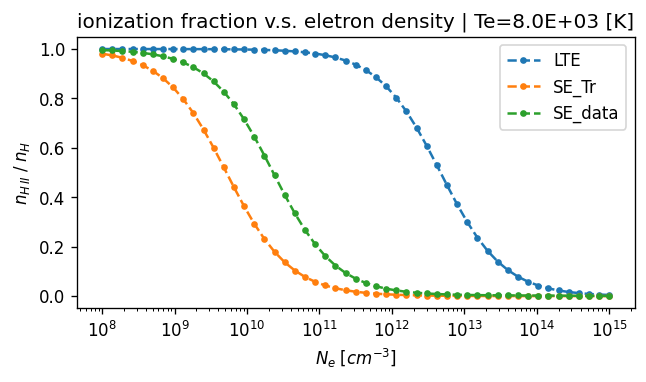

In [31]:
## plot
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=120)

for i, name in enumerate(eta.keys()):
    ax.plot(Ne[:], eta[name][:], '--o', markersize=3, label=name)

ax.set_xlabel("$N_{e} \; [cm^{-3}]$")
ax.set_ylabel("$ n_{H\, II} \; / \; n_{H} $")
ax.legend(loc="best")
ax.set_xscale('log')
ax.set_title(f"ionization fraction v.s. eletron density | Te={atmos.Te:1.1E} [K]")
plt.show()

## ionization fraction ($T_{e},N_{e}$)


In [32]:
nTe = 61
Te = np.linspace(5E3, 2E4, nTe)
nNe = 61
Ne = np.logspace(8,14, nNe)
Tr = 6.E3
#Te2d, Ne2d = np.meshgrid(Te, Ne)


kLevel = -1

eta = {
    "Local Termal Equil.": np.zeros((nNe,nTe)),
    "Statistical Equil." : np.zeros((nNe,nTe)),
    "Coronal Equil." : np.zeros((nNe,nTe)),
}

n_LTE    = np.ones((atom.nLevel, nNe))
n_SE_Tr  = np.ones((atom.nLevel, nNe))

for ke in range(nNe):
    for kt in range(nTe):
        ## LTE and Statistical Equilibrium
        atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=Ne[ke], Te=Te[kt], Vd=0., Vt=5.E5, Tr=6.E3, use_Tr=False)
        SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)

        eta["Local Termal Equil."][ke,kt] = SE_con.n_LTE[kLevel] / SE_con.n_LTE[:].sum()
        eta["Statistical Equil."][ke,kt]  = SE_con.n_SE[kLevel] / SE_con.n_SE[:].sum()

        ## `Tr=0, use_Tr=True` to shut down radiation --> Coronal Equilibrium
        atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=Ne[ke], Te=Te[kt], Vd=0., Vt=5.E5, Tr=0., use_Tr=True)
        SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)

        eta["Coronal Equil."][ke,kt] = SE_con.n_SE[kLevel] / SE_con.n_SE[:].sum()


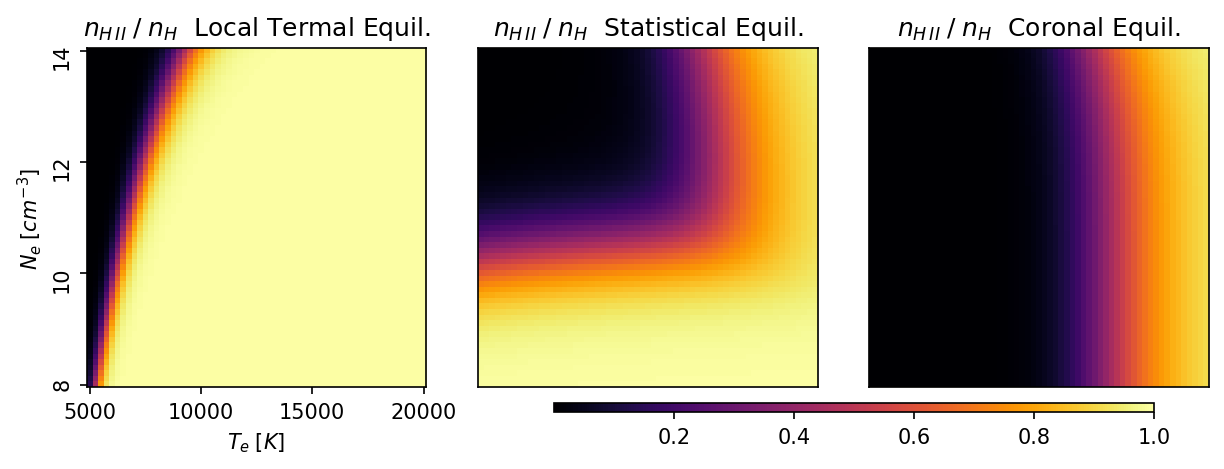

In [34]:
fig, axs = plt.subplots(1,3, figsize=(10,3), dpi=150)
plt.subplots_adjust(wspace=0.03)

for ax, name in zip( axs, eta.keys() ):
    im = ax.imshow(eta[name][:,:], cmap="inferno", origin="lower", vmin=1.E-9, vmax=1.)

    Plotting.set_imshow_ticks_(ax, Te, axis='x',points=4, fmt='%1.0f',rot=0)
    Plotting.set_imshow_ticks_(ax, np.log10(Ne), axis='y',points=4, fmt='%1.0f',rot=90)
    ax.set_title("$ n_{H\, II} \; / \; n_{H} $" + f"  {name}")

axs[0].set_ylabel("$N_{e} \; [cm^{-3}]$")
axs[0].set_xlabel("$T_{e} \; [K]$")
Plotting.remove_tick_ticklabel_(axs[1],axs[2], kind='xy')

cax = fig.add_axes([0.45,0.07,0.4,0.02])
fig.colorbar(im, cax=cax, orientation="horizontal")

plt.show()

## $N_{e}$ iteration, with QS background radiation

In [35]:
Te = 1.E4
#Ne = 1E11
Tr = 6.E3
Vd = 0.E5
Vt = 5.E5

Nh  = 1E12      # [cm^{-3}]

atmos = Atmosphere.Atmosphere0D(Nh=Nh, Ne=0., Te=Te, Vd=Vd, Vt=Vt, Tr=Tr, use_Tr=False)
SE_con, Rate_con = SELib.cal_SE_with_Nh_Te_(atom, atmos, wMesh,radiation, None)


print(f"Electron temperature  = {Te:.1E}")
print(f"Electron density      = {atmos.Ne:.1E}")
print('-'*35)
print("SE  :")
for v in SE_con.n_SE[:]:
    print(f"{v:.4E}",end="  ")
print(f"\nLTE :")
for v in SE_con.n_LTE[:]:
    print(f"{v:.4E}",end="  ")

Electron temperature  = 1.0E+04
Electron density      = 1.6E+11
-----------------------------------
SE  :
8.4416E-01  3.3450E-07  3.1010E-09  1.1349E-09  8.6830E-10  8.2319E-10  8.9060E-10  1.0464E-09  1.5584E-01  
LTE :
4.6413E-04  1.3450E-08  3.3810E-09  2.7911E-09  3.0577E-09  3.6308E-09  4.3993E-09  5.3283E-09  9.9954E-01  

### population v.s. Electron temperature

In [36]:
nTe = 51
Te_arr = np.linspace(3E3, 2E4, nTe)
Nh = 1E11               # [cm^{-3}]
Vd = 0E5 # [cm]
Vt = 5E5 # [cm]
Tr = 6E3
use_Tr = False


Ne  = 0.5 * Nh
Ne0 = 1E-4 * Nh # イオン化バルブ効果

pop_arr = {
    "LTE" : np.empty((atom.nLevel, nTe), dtype="float64"),
    "SE"  : np.empty((atom.nLevel, nTe), dtype="float64"),
}
Ne_arr = np.empty_like(Te_arr)

for k in range(nTe):
    Te = Te_arr[k]
    
    atmos = Atmosphere.Atmosphere0D(Nh=Nh, Ne=0., Te=Te, Vd=Vd, Vt=Vt, Tr=Tr, use_Tr=use_Tr)
    SE_con, Rate_con = SELib.cal_SE_with_Nh_Te_(atom, atmos, wMesh,radiation, None)
            
    Ne_arr[k] = atmos.Ne
    pop_arr["LTE"][:,k] = SE_con.n_LTE[:]
    pop_arr["SE"][:,k] = SE_con.n_SE[:]

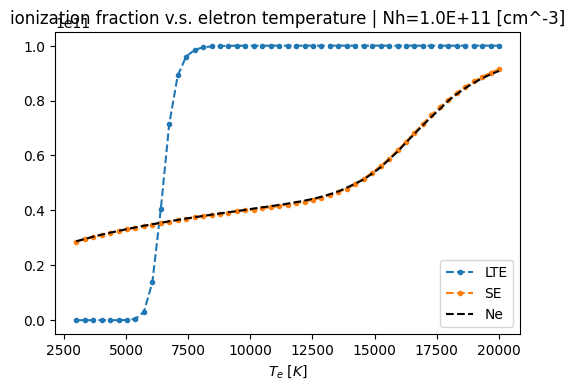

In [37]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=100, sharex = True)

kLevel = -1
for name, val in pop_arr.items():
    ax.plot(Te_arr[:], Nh*pop_arr[name][kLevel,:], '--o', markersize=3, label=name)

    
ax.set_xlabel("$T_{e} \; [K]$")
#ax.set_ylabel("$ n_{H\, II} \; / \; n_{H} $")
#ax.set_yscale('log')
#ax.set_ylim(0, 2E-7)
ax.set_title(f"ionization fraction v.s. eletron temperature | Nh={Nh:.1E} [cm^{-3}]")
#ax2 = ax.twinx()
ax.plot(Te_arr[:], Ne_arr[:], 'k--', label="Ne")
ax.legend(loc="lower right")
plt.show()

### population vs hydrogen density & electron temperature

In [38]:
nTe = 51
Te_arr = np.linspace(1E3, 2E4, nTe)
nNh = nTe
Nh_arr = np.logspace(8, 13, nNh)
Vd = 5E5 # [cm]
Vt = 5E5 # [cm]
#Tr = 6E3


pop_arr = {
    "LTE" : np.empty((atom.nLevel, nNh, nTe), dtype="float64"),
    "SE"  : np.empty((atom.nLevel, nNh, nTe), dtype="float64"),
}
Ne_arr = np.empty((nNh, nTe), dtype="float64")

for l in range(nNh):
    
    Nh = Nh_arr[l]
    
    #Ne  = 0.5 * Nh
    #Ne0 = 1E-4 * Nh # イオン化バルブ効果
    
    for k in range(nTe):
        Te = Te_arr[k]

        atmos = Atmosphere.Atmosphere0D(Nh=Nh, Ne=0., Te=Te, Vd=Vd, Vt=Vt, Tr=Tr, use_Tr=use_Tr)
        SE_con, Rate_con = SELib.cal_SE_with_Nh_Te_(atom, atmos, wMesh,radiation, None)

        Ne_arr[l,k] = atmos.Ne
        pop_arr["LTE"][:,l,k] = SE_con.n_LTE[:]
        pop_arr["SE"][:,l,k] = SE_con.n_SE[:]

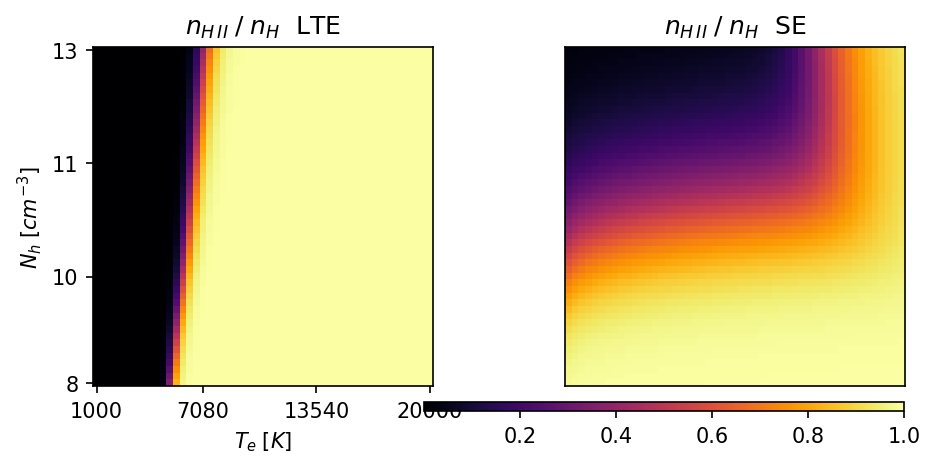

In [41]:
fig, axs = plt.subplots(1,2, figsize=(8,3), dpi=150)
plt.subplots_adjust(wspace=0.03)

for ax, name in zip( axs, pop_arr.keys() ):
    im = ax.imshow(pop_arr[name][-1,:,:], cmap="inferno", origin="lower", vmin=1.E-9, vmax=1.)

    Plotting.set_imshow_ticks_(ax, Te_arr, axis='x',points=4, fmt='%1.0f',rot=0)
    Plotting.set_imshow_ticks_(ax, np.log10(Nh_arr), axis='y',points=4, fmt='%1.0f',rot=0)
    ax.set_title("$ n_{H\, II} \; / \; n_{H} $" + f"  {name}")

axs[0].set_ylabel("$N_{h} \; [cm^{-3}]$")
axs[0].set_xlabel("$T_{e} \; [K]$")
Plotting.remove_tick_ticklabel_(axs[1], kind='xy')

cax = fig.add_axes([0.45,0.07,0.4,0.02])
fig.colorbar(im, cax=cax, orientation="horizontal")

plt.show()

## Line intensity ratio

feed the statistical container to perform `Slab model` (homogeneous slab) calculation.

In [43]:
from spectra_src.Function import SlabModel 

In [46]:
Te = 1.E4
#Ne = 1E11
Tr = 6.E3
Vd = 0.E5
Vt = 5.E5

Nh  = 1E12      # [cm^{-3}]

depth = 1.E3 * 1.E5 # 1000 [km]

atmos = Atmosphere.Atmosphere0D(Nh=Nh, Ne=0., Te=Te, Vd=Vd, Vt=Vt, Tr=Tr, use_Tr=False)
SE_con, Rate_con = SELib.cal_SE_with_Nh_Te_(atom, atmos, wMesh,radiation, None)

Cloud_con = SlabModel.SE_to_slab_0D_(atom, atmos, SE_con, depth=depth)

print(f"{'WAVELENGTH [AA]'}  {'MAX TAU'}      {'INTEGRATED INTENSITY [erg/cm^2/Sr/s]'}")
for k in (7,8,9):
    print(f"{Cloud_con.w0[k]*1.E8:.2f}{' ':10s}{Cloud_con.tau_max[k]:.2E}{' ':5s}{Cloud_con.Ibar[k]:.2E}")

WAVELENGTH [AA]  MAX TAU      INTEGRATED INTENSITY [erg/cm^2/Sr/s]
6564.63          1.52E+01     4.36E+05
4862.70          2.11E+00     1.69E+05
4341.70          7.05E-01     6.35E+04


In [45]:
HelpUtil.help_( Cloud_con )

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
CloudModel_Container
|- w0                      ndarray                              s: (28,)
|- tau_max                 ndarray                              s: (28,)
|- Ibar                    ndarray                              s: (28,)
|- prof_1D                 ndarray                              s: (1148,)
|- wl_1D                   ndarray                              s: (1148,)
|- Line_mesh_idxs          ndarray                              s: (28, 2)


---

## Grotrian Plots

solve statistical equilibrium

given $N_e$

In [52]:
Te = 1.E4
Ne = 1E11
Tr = 6.E3
Vd = 0.E5
Vt = 5.E5

Nh  = 1E12      # [cm^{-3}]

depth = 1.E3 * 1.E5 # 1000 [km]

atmos = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, Tr=Tr, use_Tr=False)
SE_con, Rate_con = SELib.cal_SE_with_Ne_Te_(atom, atmos, wMesh,radiation, None)

#--------------

ni_Line = SE_con.n_SE[ atom.Line["idxI"] ][:]
nj_Line = SE_con.n_SE[ atom.Line["idxJ"] ][:]
ni_Cont = SE_con.n_SE[ atom.Cont["idxI"] ][:]
nj_Cont = SE_con.n_SE[ atom.Cont["idxJ"] ][:]
ni = np.append( ni_Line, ni_Cont )
nj = np.append( nj_Line, nj_Cont )
#--------------
idxI = np.append( atom.Line["idxI"], atom.Cont["idxI"] )
idxJ = np.append( atom.Line["idxJ"], atom.Cont["idxJ"] )

#--------------
#Bji_Jbar = Bji_Jbar[:,0]
#Bij_Jbar = Bij_Jbar[:,0]
#Rki_stim = Rki_stim[:,0]
#Rki_spon = Rki_spon[:,0]
#Rik = Rik[:,0]
#Cji = Cji[:,0]
#Cij = Cij[:,0]



initilize `Grotrian` object

In [53]:
from spectra_src.Visual import Grotrian

In [42]:
path_dict["Grotrian"]

'/Users/liu/kouui/workspace/spectra/data/atom/H/H.Grotrian'

In [55]:
scaleFunc     = lambda x: x**(7)
scaleFunc_inv = lambda x : x**(1/7)
gro = Grotrian.Grotrian(atom, path_dict["Grotrian"], _scaleFunc=scaleFunc, _scaleFunc_inv=scaleFunc_inv, )

radiative transition net rate

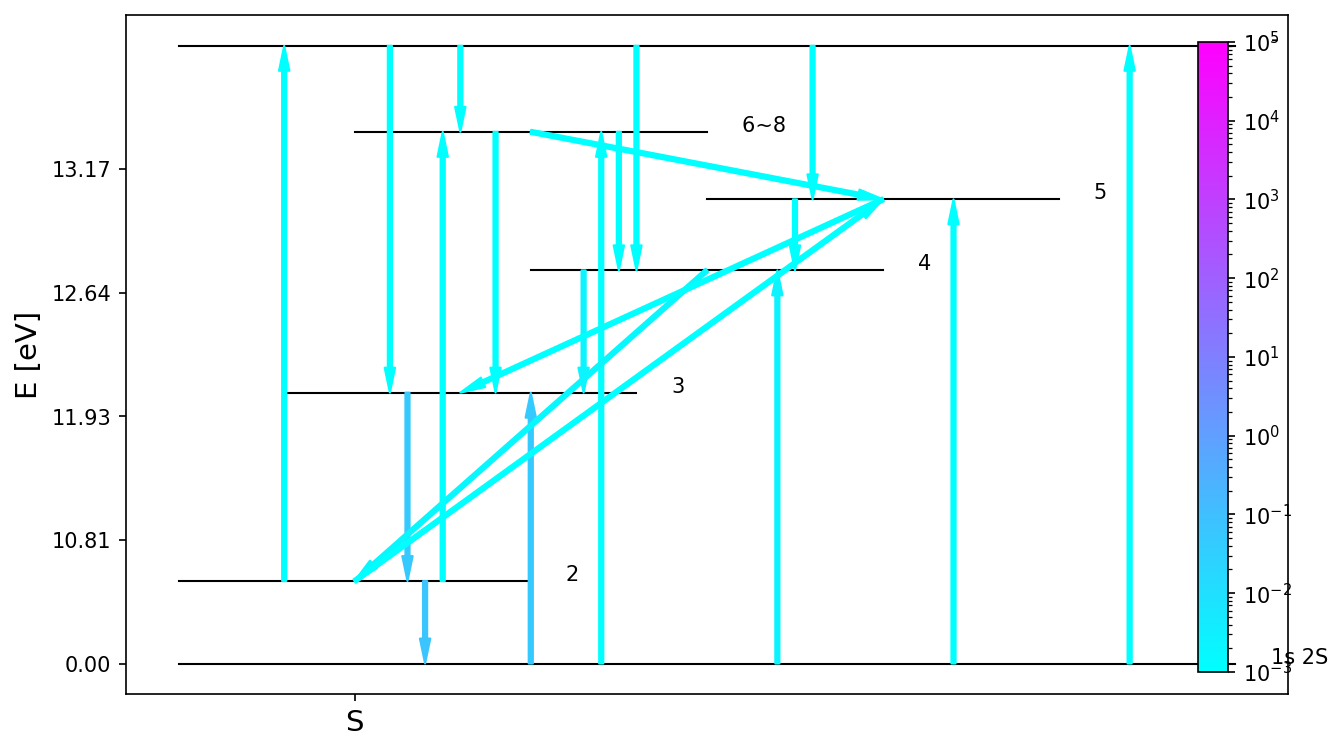

In [60]:
# create figure with figsize and dpi
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50)

cmap = plt.get_cmap('cool')
norm = LogNorm(1E-3, 1E5, clip=True)

# specify the rate you want to plot as arrow
rate_rad = - Rate_con.Rij * ni  + (Rate_con.Rji_stim + Rate_con.Rji_spon) * nj
#--------------

gro.plot_transition_rate(_idxI=idxI,
                         _idxJ=idxJ,
                         _rate=rate_rad,
                         _direction="j->i", # positive direction of arrow
                         _cmap=cmap, _norm=norm, _abserr=1E-5)
gro.add_colorbar(_cmap=cmap, _norm=norm)

collisional transition net rate

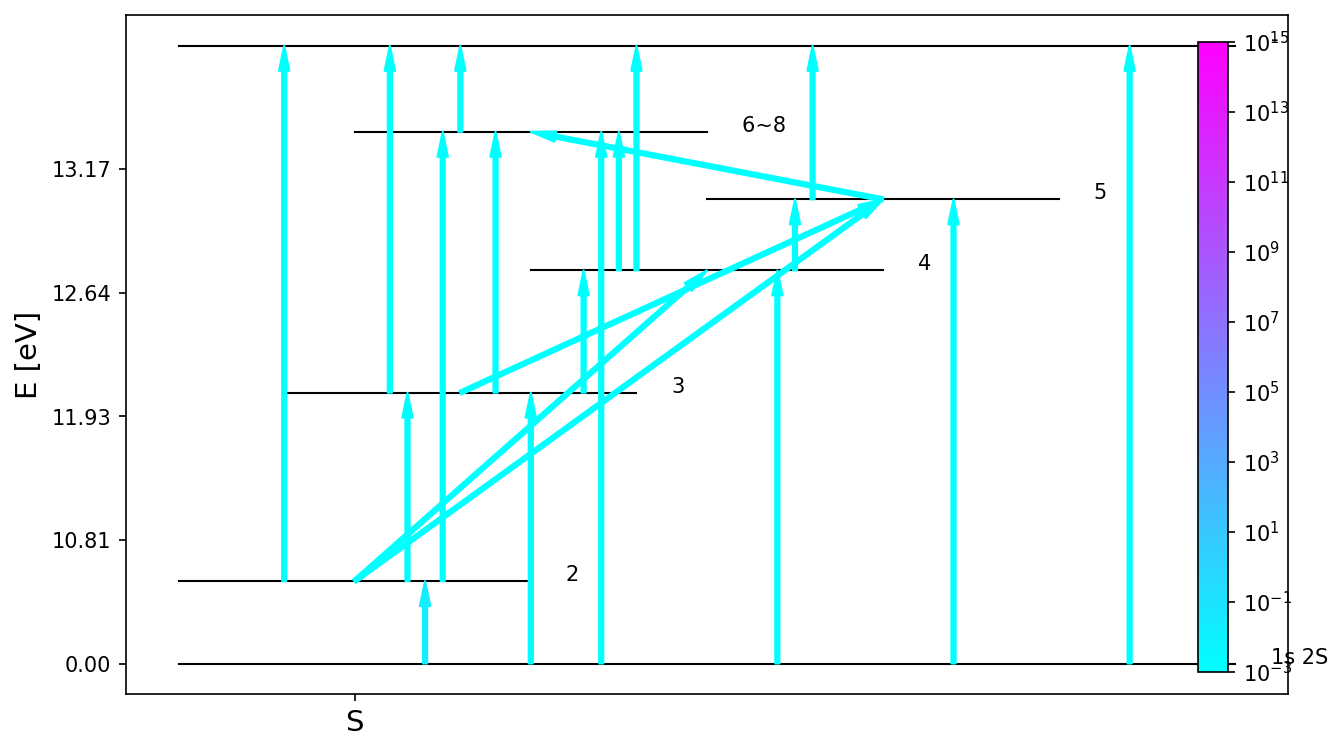

In [55]:
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50)

cmap = plt.get_cmap('cool')
norm = LogNorm(1E-3, 1E15, clip=True)


#--------------
rate_col = (Rate_con.Cji_Ne * nj - Rate_con.Cij_Ne * ni) #* atmos.Nh  # [cm^{-3} s^{-1}]
#--------------


gro.plot_transition_rate(_idxI=idxI,
                         _idxJ=idxJ,
                         _rate=rate_col,
                         _direction="j->i",
                         _cmap=cmap, _norm=norm, _abserr=1E-5)
gro.add_colorbar(_cmap=cmap, _norm=norm)

radiative + collisional net rate

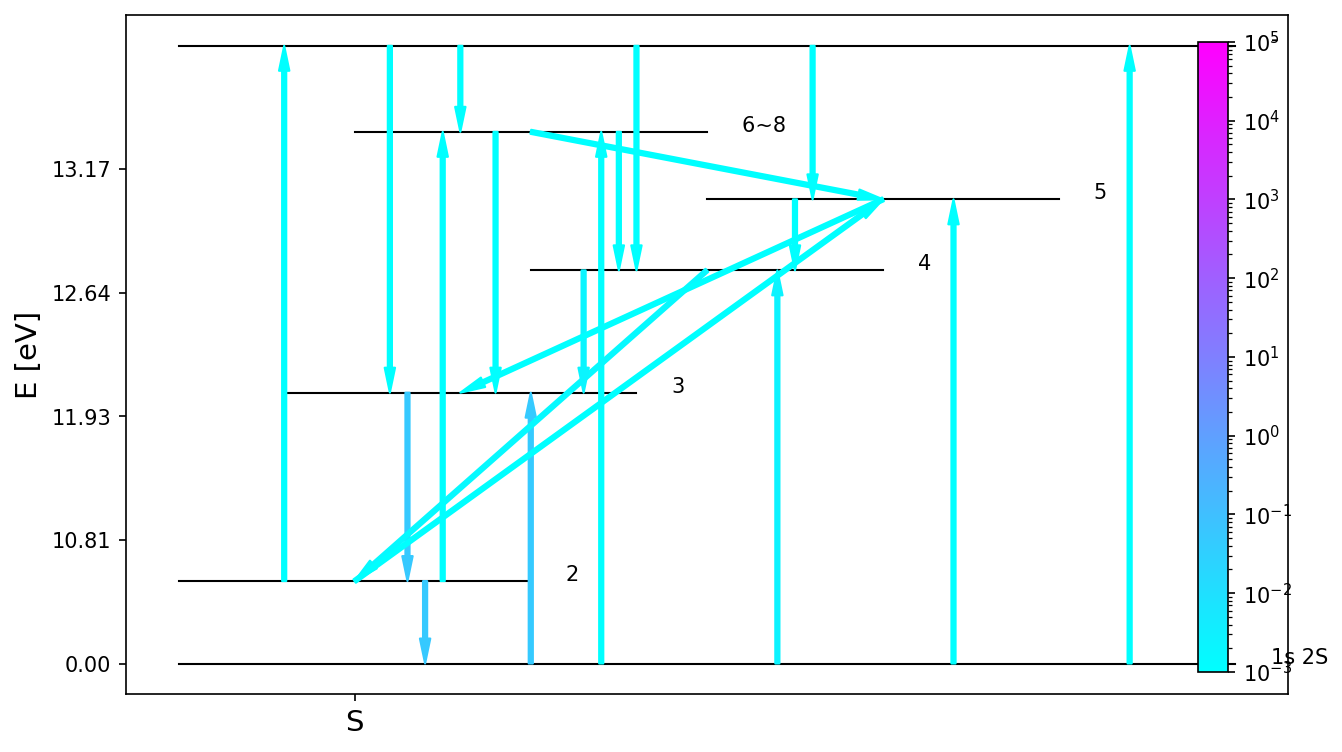

In [58]:
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50)

cmap = plt.get_cmap('cool')
norm = LogNorm(1E-3, 1E5, clip=True)

#--------------
rate = rate_rad + rate_col
#--------------

gro.plot_transition_rate(_idxI=idxI,
                         _idxJ=idxJ,
                         _rate=rate,
                         _direction="j->i",
                         _cmap=cmap, _norm=norm, _abserr=1E-5)
gro.add_colorbar(_cmap=cmap, _norm=norm)

## transition heat map

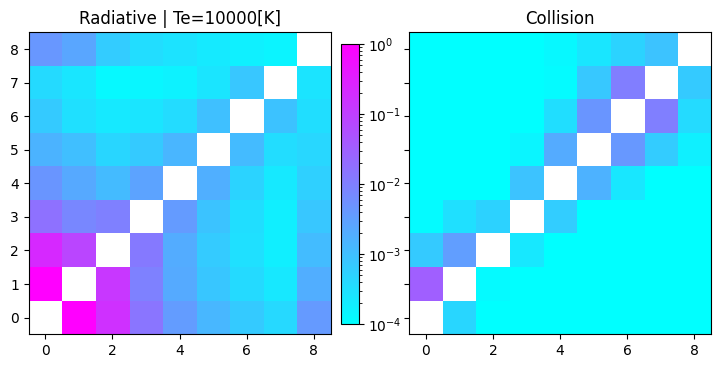

In [48]:
tran_mat = {
    "Radiative" : Rate_con.Rmat * SE_con.n_SE.reshape(1,-1),
    "Collision" : Rate_con.Cmat * SE_con.n_SE.reshape(1,-1),
}

# flow : x-axis --> y-axis


fig, axs = plt.subplots(1,2, figsize=(9,4), dpi=100, sharey=True)
norm = LogNorm(1E-4, 1E-0, clip=True)

for ax, name in zip( axs, ("Radiative", "Collision") ):
    im = ax.imshow( tran_mat[name], origin="lower", cmap="cool", norm=norm )
    if name == "Radiative":
        ax.set_title(name+f" | Te={Te:.0f}[K]") 
    else:
        ax.set_title(name)

# colorbar
cax = fig.add_axes([0.48, 0.15, 0.02, 0.7])
fig.colorbar( im, cax=cax, orientation='vertical')

plt.show()

del ax, name, im

# [/s* cm^{-3}]
